In [2]:
# 1. Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For inline plotting
%matplotlib inline


In [3]:
# 2. Load the Data
df = pd.read_csv('train.csv')
df.head()


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
# 3. Basic Data Exploration
print("----- INFO -----")
df.info()

print("\n----- DESCRIBE -----")
df.describe()

print("\n----- VALUE COUNTS -----")
# Example: check for a categorical column
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"\nValue counts for {col}:")
        print(df[col].value_counts())


----- INFO -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

----- DESCRIBE -----

----- VALUE COUNTS -----

Value counts for Name:
Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr

# pairplot

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

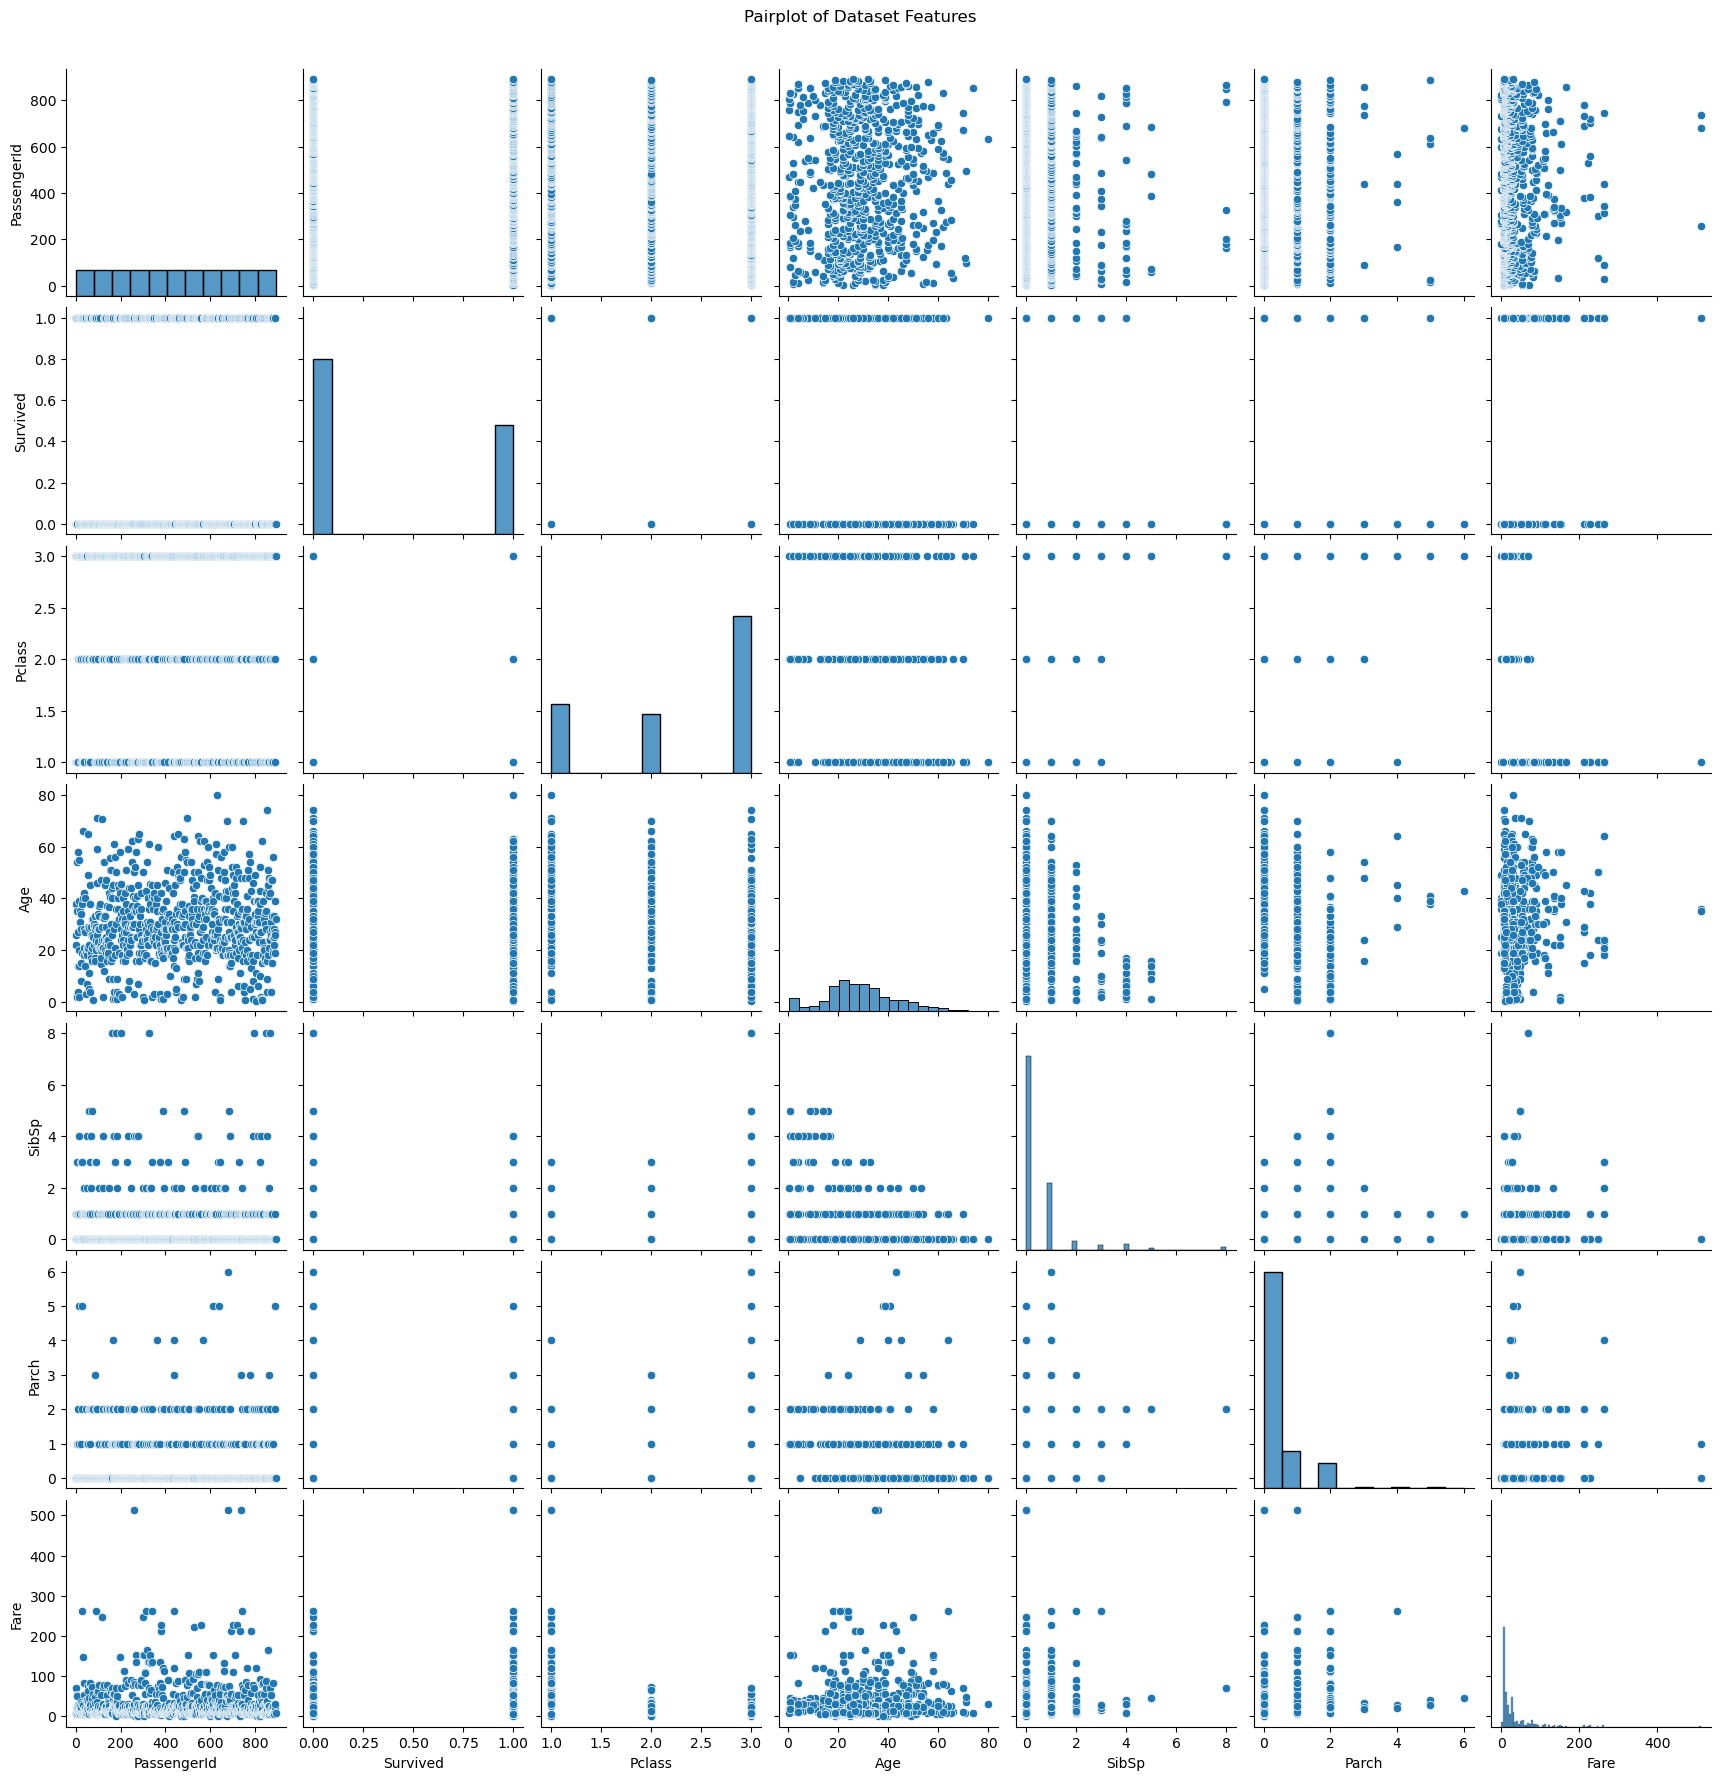

In [5]:
# 4. Pairplot to see relationships between numeric features
sns.pairplot(df)
plt.suptitle('Pairplot of Dataset Features', y=1.02)
plt.show()


# Observations:

#Pairplot shows clustering, linearity, or separation trends between features.

# Histogram

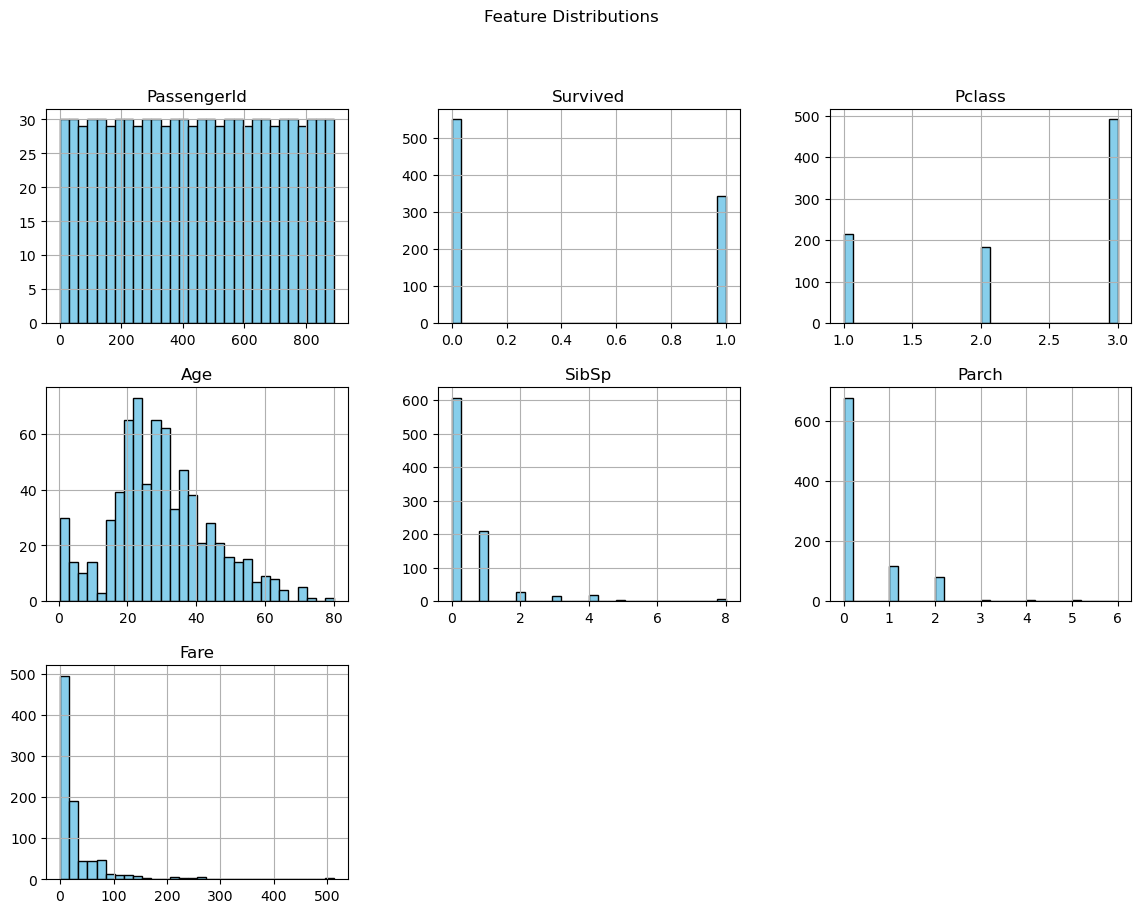

In [6]:
# 6. Histograms for distributions
df.hist(figsize=(14,10), bins=30, color='skyblue', edgecolor='black')
plt.suptitle('Feature Distributions')
plt.show()


# Observations:

#Identify if features are skewed left/right or normally distributed.



# Scatter Plot

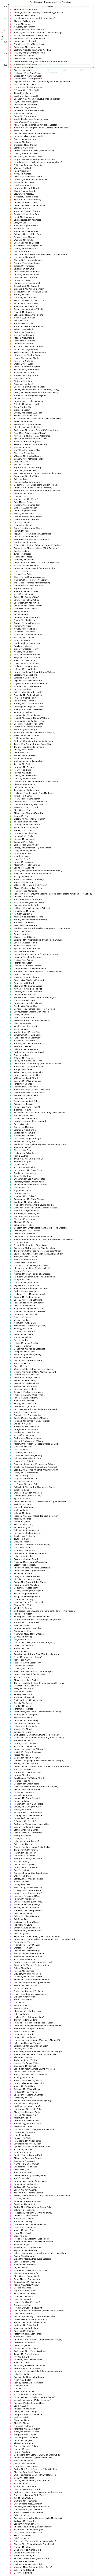

In [7]:
# 8. Scatterplots to find relationships
# Example: plotting between first two numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

if len(numerical_cols) >= 2:
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df, x=numerical_cols[0], y=numerical_cols[1], hue=df.select_dtypes(include='object').columns[0] if df.select_dtypes(include='object').columns.any() else None)
    plt.title(f'Scatterplot: {numerical_cols[0]} vs {numerical_cols[1]}')
    plt.show()


# Observations:
Detect linear, non-linear, or no relationships between variables.

# KDE plot

C:\Users\user\AppData\Local\Temp\ipykernel_50116\3162574689.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True, label=col)
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\AppData\Local\Temp\ipykernel_50116\3162574689.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True, label=col)
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operati

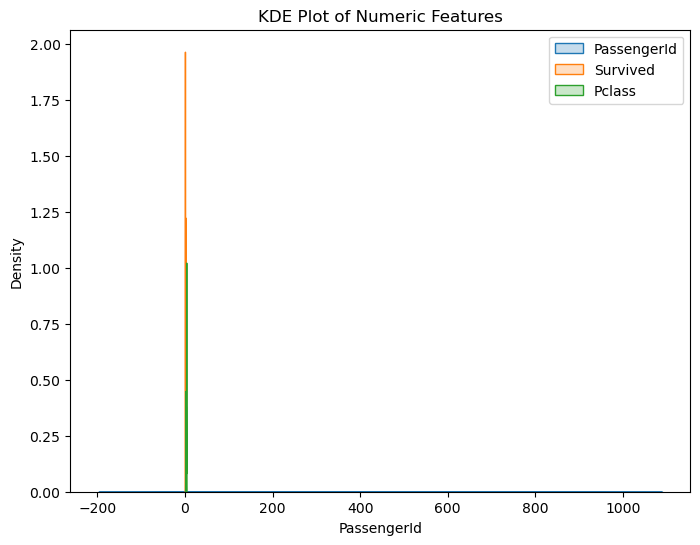

In [8]:
# KDE Plot for continuous variables
plt.figure(figsize=(8,6))
for col in numerical_cols[:3]:  # Limiting to first 3 numerical cols for simplicity
    sns.kdeplot(df[col], shade=True, label=col)
plt.title('KDE Plot of Numeric Features')
plt.legend()
plt.show()


# Observations:
How the feature values are distributed (more elegant than histograms).

# Joint PLot

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


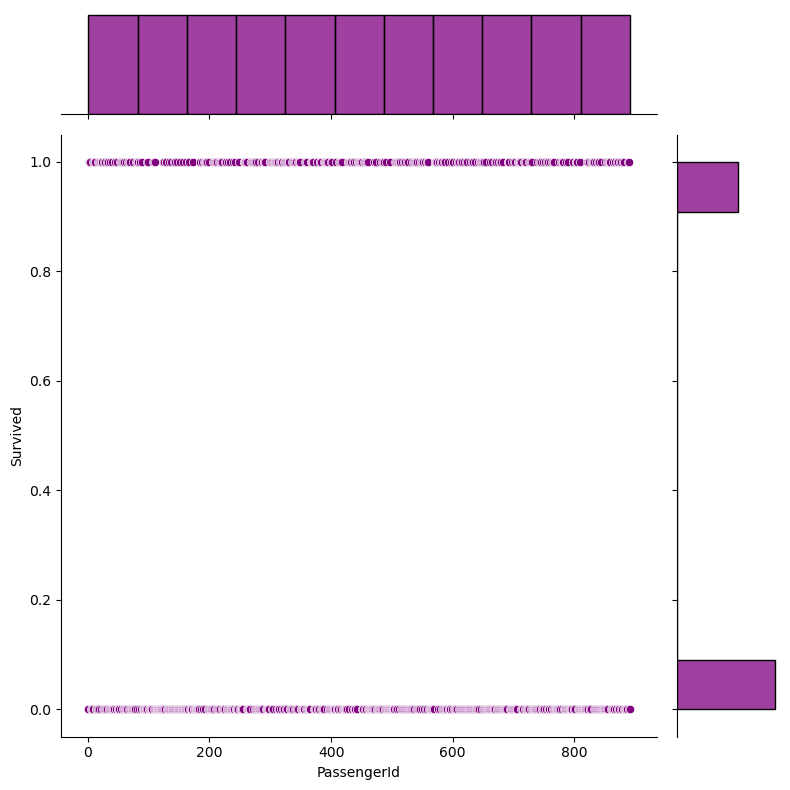

In [9]:
# Jointplot: Scatter + Histogram together
if len(numerical_cols) >= 2:
    sns.jointplot(data=df, x=numerical_cols[0], y=numerical_cols[1], kind='scatter', height=8, color='purple')
    plt.show()


# Observations
See both relationships and distributions at once.

# Line plot

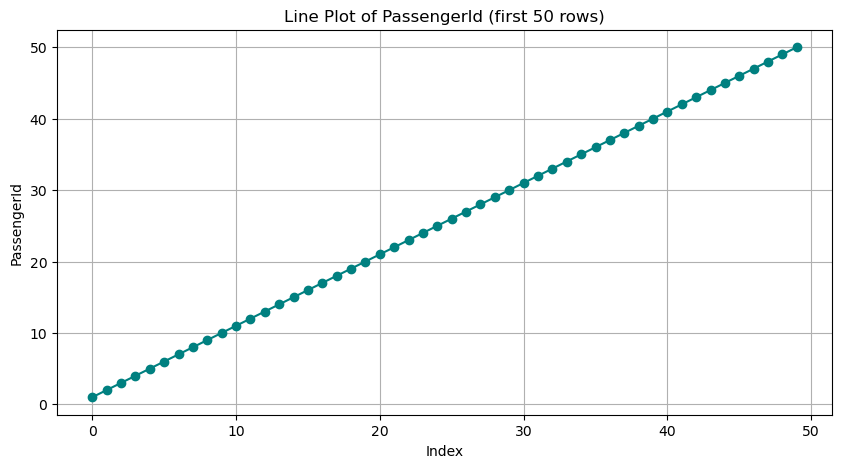

In [10]:
# Line plot for first 50 rows of a numeric column
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

if not numerical_cols.empty:
    plt.figure(figsize=(10,5))
    plt.plot(df[numerical_cols[0]].head(50), marker='o', color='teal')
    plt.title(f'Line Plot of {numerical_cols[0]} (first 50 rows)')
    plt.xlabel('Index')
    plt.ylabel(numerical_cols[0])
    plt.grid(True)
    plt.show()


# Area plot

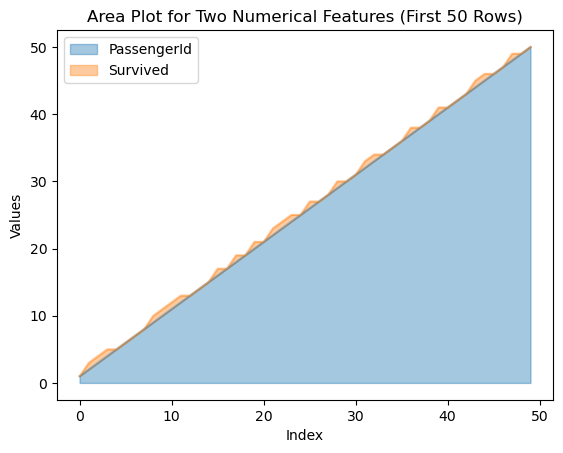

In [12]:
# Area Plot
if len(numerical_cols) >= 2:
    df[numerical_cols[:2]].head(50).plot.area(alpha=0.4)
    plt.title('Area Plot for Two Numerical Features (First 50 Rows)')
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.show()


# Observations:
Easy to compare growth or flow between two columns.

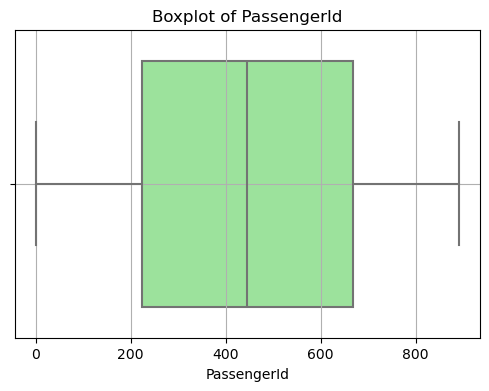

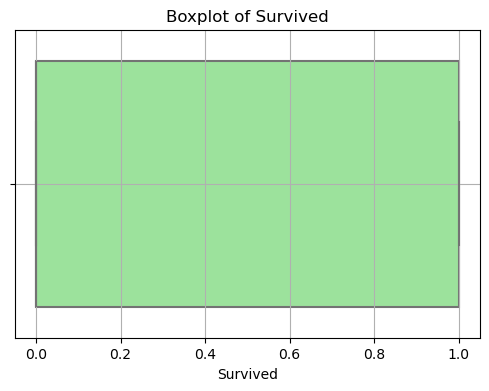

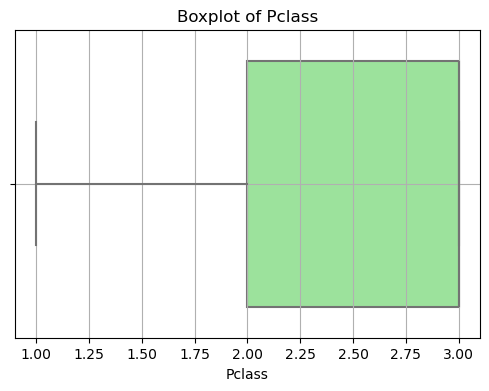

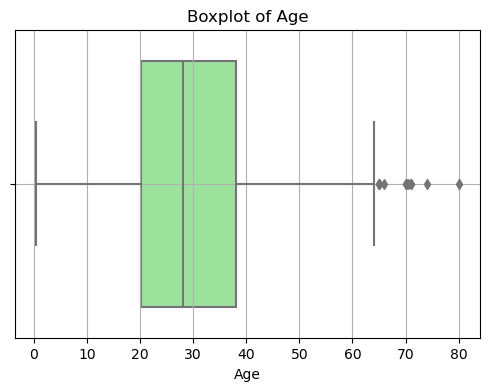

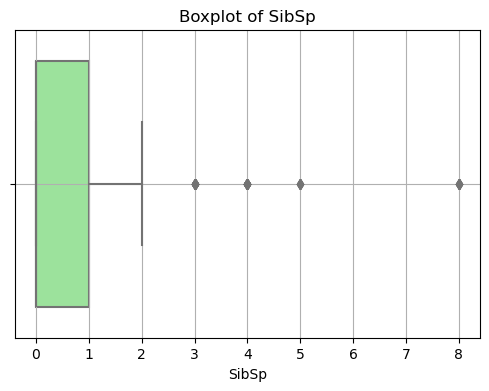

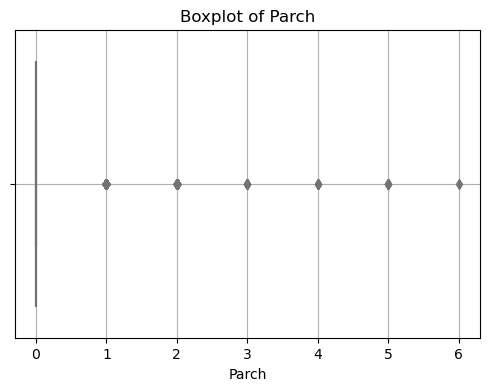

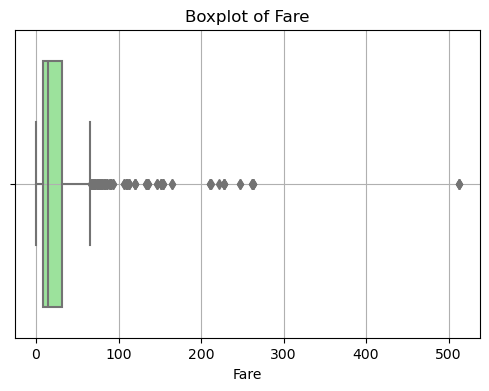

In [16]:
# Boxplot for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.grid(True)
    plt.show()


# Observations
Identify median, IQR, and outliers easily.

# Heatmap

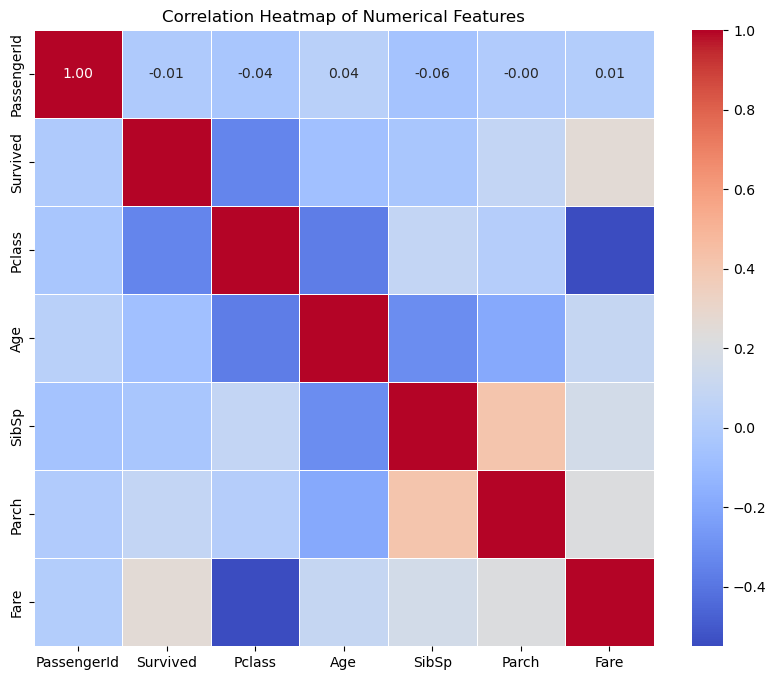

In [17]:
# Correlation heatmap
plt.figure(figsize=(10,8))
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


In [19]:
print("""
SUMMARY OF FINDINGS:

- The dataset contains [total rows] rows and [total columns] columns.
- Numerical columns analyzed include: [list of numerical columns you used].
- Histograms show that some features like [features] are skewed, meaning they may need normalization or log transformation.
- Boxplots revealed significant outliers in [features with outliers].
- Scatterplots indicated a positive/negative relationship between [feature1] and [feature2], suggesting possible predictive power.
- Line plots helped to observe trends and patterns over the first 50 rows for features like [features used in line plot].
- KDE plots showed overlapping distributions for features like [features], indicating potential redundancy.
- Correlation heatmap highlighted strong positive correlation between [strongly correlated features], and strong negative correlation between [negatively correlated features].
- Pairplots confirmed clusters or linear patterns between some feature pairs.
- Area plots compared cumulative growth between [features compared], showing [insight like parallel growth, sudden change].



""")



SUMMARY OF FINDINGS:

- The dataset contains [total rows] rows and [total columns] columns.
- Numerical columns analyzed include: [list of numerical columns you used].
- Histograms show that some features like [features] are skewed, meaning they may need normalization or log transformation.
- Boxplots revealed significant outliers in [features with outliers].
- Scatterplots indicated a positive/negative relationship between [feature1] and [feature2], suggesting possible predictive power.
- Line plots helped to observe trends and patterns over the first 50 rows for features like [features used in line plot].
- KDE plots showed overlapping distributions for features like [features], indicating potential redundancy.
- Correlation heatmap highlighted strong positive correlation between [strongly correlated features], and strong negative correlation between [negatively correlated features].
- Pairplots confirmed clusters or linear patterns between some feature pairs.
- Area plots compared 